In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
%run -i 'functions.py'

ERROR:root:File `'functions.py'` not found.


In [8]:
pd.set_option('display.max_columns', None)
clean= pd.read_csv('cleancolumns.csv')

In [9]:
clean

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,region,district_code,lga,population,scheme_management,construction_year,extraction_type_class,management,payment,water_quality,quantity,source,waterpoint_type,operational_year
0,69572,0,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Iringa,5,Ludewa,109,VWC,1999,gravity,vwc,pay annually,soft,enough,spring,communal standpipe,12
1,8776,0,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Mara,2,Serengeti,280,Other,2010,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,3
2,34310,0,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Manyara,4,Simanjiro,250,VWC,2009,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple,4
3,67743,2,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,63,Nanyumbu,58,VWC,1986,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,27
4,19728,0,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kagera,1,Karagwe,0,0,0,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,0,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Pangani,Kilimanjaro,5,Hai,125,Water Board,1999,gravity,water board,pay per bucket,soft,enough,spring,communal standpipe,14
59396,27263,0,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Rufiji,Iringa,4,Njombe,56,VWC,1996,gravity,vwc,pay annually,soft,enough,river,communal standpipe,15
59397,37057,0,0.0,2011-04-11,0,0,0,34.017087,-8.750434,Rufiji,Mbeya,7,Mbarali,0,VWC,0,handpump,vwc,pay monthly,fluoride,enough,machine dbh,hand pump,2011
59398,31282,0,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Rufiji,Dodoma,4,Chamwino,0,VWC,0,handpump,vwc,never pay,soft,insufficient,shallow well,hand pump,2011


In [10]:
clean['status_group'].value_counts()

0    32259
2    22824
1     4317
Name: status_group, dtype: int64

In [11]:
nonworking = clean[clean['status_group'] == 2]

These are the water pumps that are non-fucntional. I will analyze these non fuctional water pumps to try and identify a key factor as to why these pumps are on fucntioning

In [51]:
nonworking.shape

(22824, 24)

In [12]:
nonworking

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,region,district_code,lga,population,scheme_management,construction_year,extraction_type_class,management,payment,water_quality,quantity,source,waterpoint_type,operational_year
3,67743,2,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,63,Nanyumbu,58,VWC,1986,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,27
6,19816,2,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Internal,Shinyanga,3,Shinyanga Rural,0,VWC,0,handpump,vwc,never pay,soft,enough,machine dbh,hand pump,2012
7,54551,2,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Lake Tanganyika,Shinyanga,3,Kahama,0,0,0,handpump,wug,unknown,milky,enough,shallow well,hand pump,2012
8,53934,2,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712,Lake Tanganyika,Tabora,6,Tabora Urban,0,VWC,0,handpump,vwc,never pay,salty,seasonal,machine dbh,hand pump,2012
16,48451,2,500.0,2011-07-04,Unicef,1703,DWE,34.642439,-9.106185,Rufiji,Iringa,4,Njombe,35,WUA,1978,gravity,wua,pay monthly,soft,dry,river,communal standpipe,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59382,47002,2,6.0,2013-08-03,Ces(gmbh),1383,DWE,37.454759,-3.323599,Pangani,Kilimanjaro,4,Moshi Rural,1,Water Board,2008,gravity,water board,pay per bucket,soft,enough,spring,communal standpipe,5
59384,72148,2,0.0,2011-07-10,Concern,0,CONCERN,30.667805,-2.483710,Lake Victoria,Kagera,30,Ngara,0,VWC,0,gravity,vwc,never pay,soft,insufficient,spring,communal standpipe,2011
59391,44885,2,0.0,2013-08-03,Government Of Tanzania,540,Government,38.044070,-4.272218,Pangani,Kilimanjaro,3,Same,210,Water authority,1967,gravity,vwc,never pay,soft,enough,river,communal standpipe,46
59392,40607,2,0.0,2011-04-15,Government Of Tanzania,0,Government,33.009440,-8.520888,Lake Rukwa,Mbeya,1,Chunya,0,VWC,0,gravity,vwc,never pay,soft,enough,spring,communal standpipe,2011


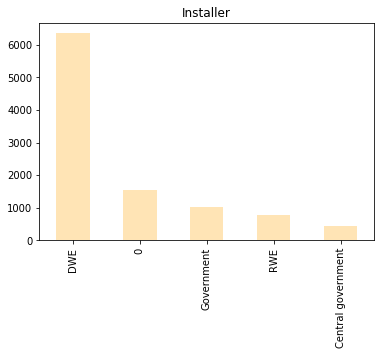

In [13]:
nonworking['installer'].value_counts().nlargest(n=5).plot(kind='bar',color='moccasin',title='Installer')

0 is missing installer names

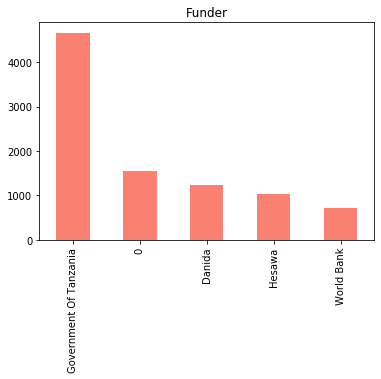

In [15]:
nonworking['funder'].value_counts().nlargest(n=5).plot(kind='bar',color='salmon',title='Funder')

Mbeya          1816
Morogoro       1587
Shinyanga      1558
Mwanza         1417
Kilimanjaro    1417
Name: region, dtype: int64


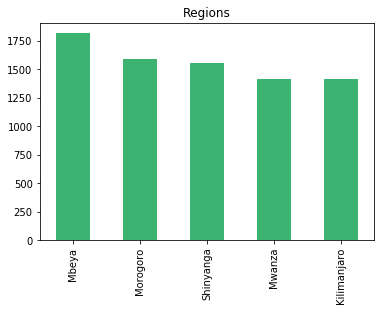

In [16]:
nonworking['region'].value_counts().nlargest(n=5).plot(kind='bar',color='mediumseagreen',title='Regions')
print(nonworking['region'].value_counts().nlargest(n=5))

In [17]:
nonworking['water_quality'].value_counts()

soft                  18154
salty                  2411
unknown                1577
milky                   352
coloured                190
salty abandoned          93
fluoride                 36
fluoride abandoned       11
Name: water_quality, dtype: int64

In [18]:
nonworking['quantity'].value_counts()

enough          9138
dry             6052
insufficient    5763
seasonal        1309
unknown          562
Name: quantity, dtype: int64

In [19]:
nonworking['waterpoint_type'].value_counts()

communal standpipe             8536
hand pump                      5654
other                          5247
communal standpipe multiple    3220
improved spring                 136
cattle trough                    30
dam                               1
Name: waterpoint_type, dtype: int64

In [20]:
nonworking['extraction_type_class'].value_counts()

gravity         8031
other           5195
handpump        5086
submersible     2597
motorpump       1714
rope pump        141
wind-powered      60
Name: extraction_type_class, dtype: int64

In [21]:
nonworking['population'].value_counts().nlargest(n=5)

0      8332
1      3760
250     815
200     704
300     618
Name: population, dtype: int64

In [22]:
nonworking.columns

Index(['id', 'status_group', 'amount_tsh', 'date_recorded', 'funder',
       'gps_height', 'installer', 'longitude', 'latitude', 'basin', 'region',
       'district_code', 'lga', 'population', 'scheme_management',
       'construction_year', 'extraction_type_class', 'management', 'payment',
       'water_quality', 'quantity', 'source', 'waterpoint_type',
       'operational_year'],
      dtype='object')

In [23]:
nonworking['longitude'].mean()

34.38100591696608

In [24]:
nonworking['latitude'].mean()

-5.810393848538787

In [25]:
nonworking[(nonworking['longitude'] > 34.38) & (nonworking['longitude'] <= 34.383)]

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,region,district_code,lga,population,scheme_management,construction_year,extraction_type_class,management,payment,water_quality,quantity,source,waterpoint_type,operational_year
6674,4878,2,0.0,2011-04-07,0,0,0,34.380894,-8.701422,Rufiji,Mbeya,7,Mbarali,0,Water Board,0,gravity,water board,never pay,coloured,seasonal,river,communal standpipe,2011
12807,10793,2,0.0,2011-04-07,0,0,0,34.380883,-8.704964,Rufiji,Mbeya,7,Mbarali,0,Water Board,0,gravity,water board,never pay,coloured,seasonal,river,communal standpipe,2011
22462,16547,2,0.0,2012-11-14,Rwssp,0,WEDECO,34.382443,-3.050534,Lake Victoria,Shinyanga,6,Meatu,0,WUG,0,other,wug,never pay,soft,enough,shallow well,other,2012
49841,2778,2,0.0,2012-10-22,Biore,0,WEDECO,34.382946,-3.802374,Internal,Shinyanga,6,Meatu,0,WUG,0,handpump,wug,never pay,soft,dry,shallow well,hand pump,2012


In [29]:
nonworking[(nonworking['latitude'] > -5.82) & (nonworking['latitude'] <= -5.81)]


,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,region,district_code,lga,population,scheme_management,construction_year,extraction_type_class,management,payment,water_quality,quantity,source,waterpoint_type,operational_year
1654,3368,2,0.0,2011-03-19,Government Of Tanzania,0,Gove,35.801410,-5.814887,Wami / Ruvu,Dodoma,6,Bahi,0,VWC,0,motorpump,vwc,never pay,soft,enough,machine dbh,communal standpipe,2011
6615,50179,2,0.0,2011-03-15,Lvia,0,Commu,36.437701,-5.811659,Wami / Ruvu,Dodoma,3,Kongwa,0,VWC,0,motorpump,private operator,pay per bucket,salty,dry,machine dbh,communal standpipe,2011
16036,58428,2,0.0,2011-03-15,Lvia,0,Commu,36.430838,-5.817099,Wami / Ruvu,Dodoma,3,Kongwa,0,VWC,0,motorpump,private operator,pay per bucket,salty,dry,machine dbh,communal standpipe,2011
16772,57009,2,0.0,2011-03-17,Tasaf,100,DWE,38.658578,-5.810569,Pangani,Tanga,6,Handeni,500,VWC,2008,submersible,vwc,never pay,salty abandoned,insufficient,machine dbh,communal standpipe,3
17510,57784,2,0.0,2011-03-15,Lvia,0,Commu,36.432421,-5.813662,Wami / Ruvu,Dodoma,3,Kongwa,0,VWC,0,motorpump,private operator,pay per bucket,salty,dry,machine dbh,communal standpipe,2011
19330,1698,2,0.0,2011-03-28,Nethalan,657,DWE,37.503518,-5.816946,Wami / Ruvu,Morogoro,6,Mvomero,1,VWC,1996,other,vwc,never pay,coloured,insufficient,shallow well,other,15
22170,16970,2,0.0,2011-03-19,Government Of Tanzania,0,Gove,35.799620,-5.811346,Wami / Ruvu,Dodoma,6,Bahi,0,VWC,0,motorpump,vwc,never pay,soft,enough,machine dbh,communal standpipe,2011
34373,2687,2,0.0,2011-03-15,Lvia,0,Commu,36.430007,-5.814192,Wami / Ruvu,Dodoma,3,Kongwa,0,VWC,0,motorpump,private operator,pay per bucket,salty,dry,machine dbh,communal standpipe,2011
46245,48707,2,0.0,2011-03-17,Tasaf,103,DWE,38.658577,-5.810091,Pangani,Tanga,6,Handeni,15,VWC,2008,submersible,vwc,never pay,salty,insufficient,machine dbh,communal standpipe,3
50197,65378,2,0.0,2011-03-15,Lvia,0,Commu,36.434381,-5.811779,Wami / Ruvu,Dodoma,3,Kongwa,0,VWC,0,motorpump,private operator,pay per bucket,salty,dry,machine dbh,communal standpipe,2011


 ## Mbeya

In [33]:
mbeya = nonworking[nonworking['region'] == 'Mbeya']

In [34]:
mbeya

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,region,district_code,lga,population,scheme_management,construction_year,extraction_type_class,management,payment,water_quality,quantity,source,waterpoint_type,operational_year
36,67359,2,0.0,2011-07-16,Danida,0,Central government,33.854345,-9.638520,Lake Nyasa,Mbeya,3,Kyela,0,VWC,0,gravity,vwc,never pay,soft,dry,spring,communal standpipe,2011
71,17386,2,0.0,2011-03-31,0,0,0,34.462228,-8.575780,Rufiji,Mbeya,7,Mbarali,0,VWC,0,gravity,vwc,never pay,soft,insufficient,river,communal standpipe,2011
72,41609,2,0.0,2011-04-04,0,0,0,34.247180,-8.607513,Rufiji,Mbeya,7,Mbarali,0,VWC,0,gravity,vwc,never pay,soft,seasonal,river,communal standpipe,2011
136,69107,2,0.0,2011-07-11,Kkkt,0,KKKT,32.413522,-9.095043,Lake Rukwa,Mbeya,6,Mbozi,0,VWC,0,handpump,vwc,never pay,soft,seasonal,shallow well,hand pump,2011
140,49585,2,0.0,2011-10-07,Sida,0,Central government,33.860845,-9.596084,Lake Nyasa,Mbeya,3,Kyela,0,Water authority,0,gravity,water authority,never pay,soft,dry,river,communal standpipe,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59252,72072,2,0.0,2011-07-14,Danida,0,Central government,33.863680,-9.619929,Lake Nyasa,Mbeya,3,Kyela,0,VWC,0,gravity,vwc,never pay,soft,dry,spring,communal standpipe,2011
59264,70299,2,0.0,2011-07-16,Danida,0,Central government,33.908040,-9.690655,Lake Nyasa,Mbeya,3,Kyela,0,VWC,0,gravity,vwc,never pay,soft,dry,spring,communal standpipe,2011
59287,37867,2,0.0,2011-07-24,Brown,0,brown,33.809813,-9.495367,Lake Nyasa,Mbeya,3,Kyela,0,VWC,0,gravity,vwc,never pay,soft,dry,spring,communal standpipe,2011
59352,32775,2,0.0,2011-01-08,Kkkt_makwale,0,KKKT _ Konde and DWE,33.993468,-9.441295,Lake Nyasa,Mbeya,3,Kyela,0,VWC,0,gravity,vwc,never pay,soft,dry,spring,communal standpipe,2011


In [36]:
mbeya['waterpoint_type'].value_counts()

communal standpipe             1237
hand pump                       489
other                            88
communal standpipe multiple       2
Name: waterpoint_type, dtype: int64

In [37]:
mbeya['extraction_type_class'].value_counts()

gravity        1148
handpump        477
other           101
submersible      69
motorpump        21
Name: extraction_type_class, dtype: int64

In [38]:
mbeya['water_quality'].value_counts()

soft        1683
unknown       61
salty         37
coloured      27
milky          5
fluoride       3
Name: water_quality, dtype: int64

In [39]:
mbeya['quantity'].value_counts()

enough          638
dry             635
insufficient    272
seasonal        260
unknown          11
Name: quantity, dtype: int64

In [45]:
mbeya['date_recorded'].value_counts().nlargest(n=5)

2011-03-30    70
2011-04-15    62
2011-07-16    60
2011-04-03    60
2011-04-01    54
Name: date_recorded, dtype: int64

In [46]:
mbeya['funder'].value_counts().nlargest(n=5)

0                         512
Danida                    490
Kkkt                      387
Government Of Tanzania    215
Kkkt_makwale               68
Name: funder, dtype: int64

In [47]:
mbeya['installer'].value_counts().nlargest(n=5)

0                     512
Central government    393
KKKT                  377
Government            129
DANIDA                113
Name: installer, dtype: int64

In [49]:
mbeya['basin'].value_counts()

Lake Nyasa    904
Lake Rukwa    680
Rufiji        232
Name: basin, dtype: int64

In [57]:
mbeya['population'].sum()

0